## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = study_results.merge(mouse_metadata, on = "Mouse ID", how = 'left')
# Display the data table for preview
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_number = combined["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_timepoint_group = combined.groupby(["Mouse ID","Timepoint"]).count()
duplicate_mice_id = id_timepoint_group[id_timepoint_group["Sex"] > 1].index.get_level_values(0).unique()
duplicate_mice_id = duplicate_mice_id.tolist()
duplicate_mice_id

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined[combined["Mouse ID"].isin(duplicate_mice_id)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_data = combined[~combined["Mouse ID"].isin(duplicate_mice_id)].reset_index(drop = True)
filtered_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
filtered_mice_num = filtered_data["Mouse ID"].nunique()
filtered_mice_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_tumor_mean = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_tumor_median = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_tumor_var = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_tumor_std = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_tumor_sem = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_tumor = pd.concat([drug_tumor_mean,drug_tumor_median,drug_tumor_var,drug_tumor_std,drug_tumor_sem], axis=1)
drug_tumor.columns = ["mean","median","var","std","sem"]
drug_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_agg = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

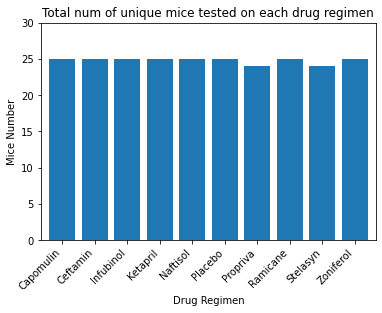

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = filtered_data.groupby("Drug Regimen")["Mouse ID"].nunique()
mice_per_drug.plot(kind="bar", title="Total num of unique mice tested on each drug regimen", width=0.8)
plt.ylabel("Mice Number")
plt.ylim(0,30)
plt.xticks(rotation=45, ha="right")
plt.show()

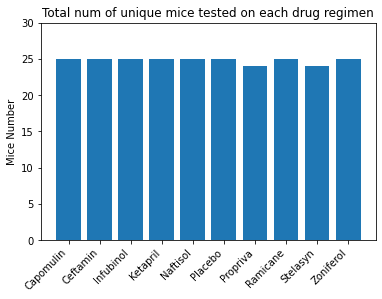

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(mice_per_drug.index, mice_per_drug.values)
plt.title("Total num of unique mice tested on each drug regimen")
plt.ylabel("Mice Number")
plt.ylim(0,30)
plt.xticks(rotation=45, ha="right")
plt.show()

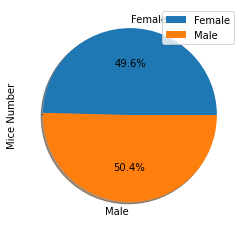

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = filtered_data.groupby("Sex")["Mouse ID"].nunique()
sex_distribution.plot(kind="pie", shadow=True, autopct='%1.1f%%')
plt.ylabel("Mice Number")
plt.legend()
plt.show()

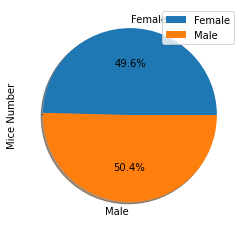

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution.values, labels = sex_distribution.index, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.ylabel("Mice Number")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = filtered_data.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lasttime_data = filtered_data.merge(last_time, how = "inner", on=("Mouse ID","Timepoint"))
lasttime_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = lasttime_data[lasttime_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol.gt(upper_bound)) | (tumor_vol.lt(lower_bound))]
    outliers_id = lasttime_data.iloc[outliers.index]["Mouse ID"].values
    print(f"{drug} has the following outliers: {outliers_id}")

Capomulin has the following outliers: []
Ramicane has the following outliers: []
Infubinol has the following outliers: ['c326']
Ceftamin has the following outliers: []


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

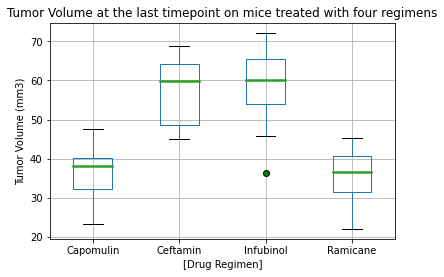

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_all = pd.DataFrame()
for drug in treatments:
    plt.figure()
    tumor_vol = lasttime_data[lasttime_data["Drug Regimen"] == drug][["Drug Regimen","Tumor Volume (mm3)"]]
    tumor_vol_all = tumor_vol_all.append(tumor_vol)

flierprops = dict(marker='o', markerfacecolor='green')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
tumor_vol_all.boxplot(by="Drug Regimen", flierprops=flierprops, medianprops=medianprops)
plt.title("Tumor Volume at the last timepoint on mice treated with four regimens")
plt.suptitle("")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

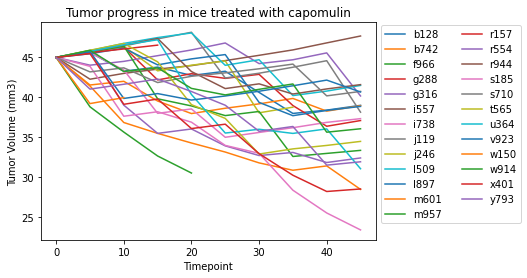

In [136]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_raw = filtered_data[filtered_data["Drug Regimen"] == "Capomulin"][["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
capomulin_groupby = capomulin_raw.pivot(index="Timepoint", columns="Mouse ID", values="Tumor Volume (mm3)")
capomulin_groupby.plot()
plt.legend(bbox_to_anchor=(1, 1.01), loc='best', ncol=2)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor progress in mice treated with capomulin")
plt.show()

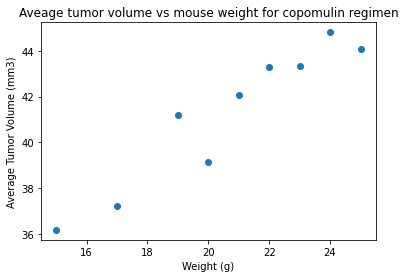

In [140]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_groupby2 = capomulin_raw.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
plt.scatter(capomulin_groupby2.index, capomulin_groupby2.values)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Aveage tumor volume vs mouse weight for copomulin regimen")
plt.show()

## Correlation and Regression

The r-squared is: 0.9034966277438602


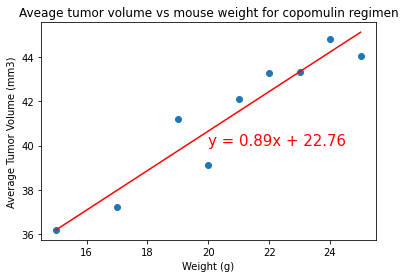

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_groupby2.index
y_values = capomulin_groupby2.values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Aveage tumor volume vs mouse weight for copomulin regimen")
print(f"The r-squared is: {rvalue**2}")
plt.show()